In [52]:
import flickrapi
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
api_key = '73d221be5e1cc2745319e4a7e39255bd'
api_secret = '541f10a0ea821424'

In [6]:
## Authenticates flickr API token
flickr = flickrapi.FlickrAPI(api_key, api_secret, format='parsed-json')
flickr.authenticate_via_browser(perms='read')


In [8]:
## Pulls data from API
photos = flickr.photos.search(min_upload_date='2020-01-01', max_upload_date='2020-12-31', hasgeo=1, extras='geo, tags, url_s')

In [9]:
## Converts data into pandas dataframe for easier analysis
data = pd.DataFrame(photos['photos']['photo']).drop(columns=['owner','secret','server','farm', 'woeid', 'geo_is_public','geo_is_friend','geo_is_contact','geo_is_family'])

In [10]:
## Preview data
data.head()

,id,title,ispublic,isfriend,isfamily,tags,latitude,longitude,accuracy,context,place_id,url_s,height_s,width_s
0,50780604273,Althea the Therapist is In,1,0,0,dog dogs rescuedogs lovestoplayball,42.838806,-106.321907,16,0,,https://live.staticflickr.com/65535/5078060427...,240,240
1,50781276946,800_8511,1,0,0,australianwarmuseum loxpixaustralianwarmuseum ...,-35.280828,149.142986,16,0,,https://live.staticflickr.com/65535/5078127694...,160,240
2,50781327637,TMYN8465,1,0,0,,45.482702,-122.572264,16,0,,https://live.staticflickr.com/65535/5078132763...,180,240
3,50779182753,PXL_20201230_173500074,1,0,0,,37.319455,-121.855853,16,0,,https://live.staticflickr.com/65535/5077918275...,240,180
4,50778907401,Blue Tit_Gard_29-12-20743-Edit,1,0,0,garden wildlife animlas nikon d780 sigma 150 6...,53.551323,-2.138793,15,0,,https://live.staticflickr.com/65535/5077890740...,160,240


In [79]:
## converts latitude and longitudes to numbers instead of strings
data['longitude'] = data['longitude'].astype(float)
data['latitude'] = data['latitude'].astype(float)

In [48]:
## How many images were pulled
len(data)

250

In [13]:
import plotly.graph_objects as go

In [88]:
## Automatically creates coordinates for each image corner based on geo data given
def coords(longitude, latitude):
    return [
        [float(longitude - 3.0), float(latitude + 2.0)], ## Top left
        [float(longitude + 3.0), float(latitude + 2.0)], ## Top right
        [float(longitude + 3.0), float(latitude - 2.0)], ## Bottom right
        [float(longitude - 3.0), float(latitude - 2.0)], ## Bottom right
    ]

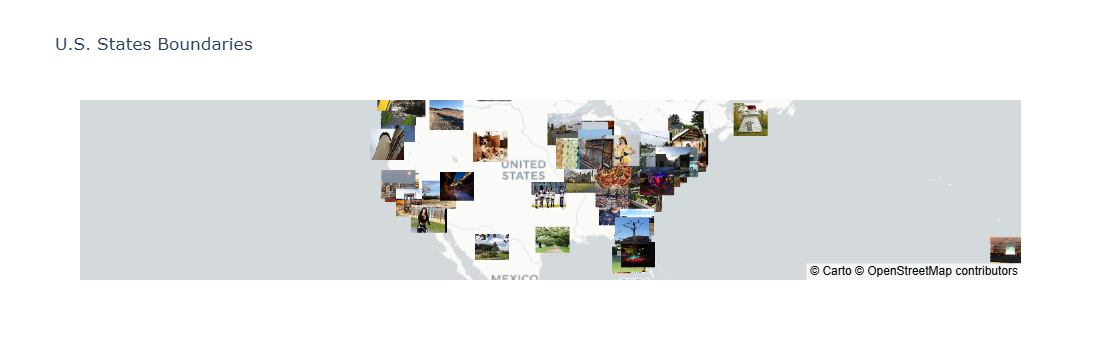

In [99]:
## Creates map
fig3 = go.Figure(go.Scattermapbox())
mapbox2 = dict(zoom=2, 
              accesstoken="pk.eyJ1IjoicnlhbnZhY2hlIiwiYSI6ImNtMzlicGE5bTEwY3gyanB0NnRpMjlxYncifQ.l9JCx0KgfP0bFE9ND4NwDw",
              style='carto-darkmatter',  #set here your prefered mapbox style 
              center=dict(
                        lat=43, 
                        lon=-75.5), 
              layers=[]
              )      

for index, row in data.iterrows() :
                   mapbox2['layers'].append(dict(
                            #below ='',    
                            source = row['url_s'], 
                            sourcetype= "image", 
                            coordinates =  coords(row['longitude'], row['latitude'])
                          ))

fig3.update_layout(mapbox=mapbox2,
    mapbox_style="carto-positron",  # Choose a Mapbox style
    mapbox_zoom=2,  # Set the zoom level
    mapbox_center={"lat": 37.0902, "lon": -95.7129},  # Center of the U.S.
    title="U.S. States Boundaries"
)